## Project 1 : Analysis of Real Estate in the Tapei Metro Region
##### By Delice Mambi-Lambu

##### Abstract and Introduction
This project is about using regression analysis to establish relationships in real estate evaluation in the Tapei Metropolis in Taiwan. We focus on features - House Age, Distance to Metro Station Longitude, Latitude and The number of convience stores within proximity of the house. We seek to see if these features will influnce the house price per unit area. 

I have two hypothesis that I would like to test:

- $H_{0,0}$ : The access to public transport , number of convinence stores and the house age will have impact on the house price per unit area. Most notably the house size. 

- $H_{1,0}$ : The converse is true. The Access to public transport , number of convinence stores and the house age will not have impact on the house price per unit area. Importantly, the House Size does not influence the House price per unit area. 

- $H_{0,1}$ : The proximity to the city centre [Lat = 25.0474 , Long = 121.5171] has an influence on the house price per unit area.

- $H_{1,1}$ : The converse is true. The proximity to the city centre [Lat = 25.0474 , Long = 121.5171] does not have an influence on the house price per unit area.

##### Citation
Real estate valuation data set. (2018). UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W.

#### Importing Libaries 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns 

We want to set our plot style using the ggplot format

In [2]:
mpl.style.use(['ggplot'])

#### Data Importing

In [3]:
# Here we obtain the path of our data file
from pathlib import Path
print(Path.cwd())

C:\Users\delic\OneDrive\Documents\Data Science Projects\Regression


In [4]:
df = pd.read_excel(r'C:\Users\delic\OneDrive\Documents\Data Science Projects\Regression\RealEstate.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### Data Cleaning 

Here we have our data set imported from our source We now seek to tidy our data ser as there are columns that we would like to drop as they are not a nessecity and also not useful in the grand scheme of things we also hope to tidy up the headings as we want to make things easier

In [5]:
# look at our data types
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
#drop the columns we do not need 
df.drop(columns = ['No', 'X1 transaction date'], inplace = True)

In [7]:
# Rename Columns to make things easier 
dic = {'X2 house age' : 'X0',
       'X3 distance to the nearest MRT station' : 'X1',
       'X4 number of convenience stores' : 'X2',
       'X5 latitude' : 'X3',
       'X6 longitude' : 'X4', 
       'Y house price of unit area' : 'Y'}

df.rename(columns = dic, inplace = True)
df.head()

,X0,X1,X2,X3,X4,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


We have tidied up our table a bit - now the focus is on data formatting and making sure all values are normalised

For Refrence: 
* x0 - House Age
* x1 - distance to nearest metro station
* x2 - number of convience stores nearby
* x3 - lattitude (to be converted to distance away from city centre - by lattitude)
* x4 - longitude (to be converted to distance away from city centre - by longitude)

* y - House Price per unit area (our target varible)

In [8]:
# Data types all our features (apart from one) are of data type float64 we will now change X2
df.dtypes

X0    float64
X1    float64
X2      int64
X3    float64
X4    float64
Y     float64
dtype: object

In [9]:
# Converting Data type
df['X2'] = df['X2'].astype('float')

In [10]:
df.dtypes

X0    float64
X1    float64
X2    float64
X3    float64
X4    float64
Y     float64
dtype: object

In [11]:
# checking for missing values
df.isnull().sum() 

X0    0
X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

As there are no null values we can now convert our features X3 and X4 for our second hypothesis. 

In [12]:
# Latitude distance between house and city centre 
df['X3'] = abs(df['X3'] - 25.0474)
df['X3']

0      0.06442
1      0.06706
2      0.05994
3      0.05994
4      0.06803
        ...   
409    0.10585
410    0.07307
411    0.06817
412    0.08066
413    0.07307
Name: X3, Length: 414, dtype: float64

In [13]:
# longitude distance between house and city centre
df['X4'] = abs(df['X4'] - 121.5171)
df['X4']

0      0.02314
1      0.02241
2      0.02681
3      0.02681
4      0.02535
        ...   
409    0.01329
410    0.02600
411    0.02276
412    0.02357
413    0.02600
Name: X4, Length: 414, dtype: float64

In [14]:
df.head()

,X0,X1,X2,X3,X4,Y
0,32.0,84.87882,10.0,0.06442,0.02314,37.9
1,19.5,306.59470,9.0,0.06706,0.02241,42.2
2,13.3,561.98450,5.0,0.05994,0.02681,47.3
3,13.3,561.98450,5.0,0.05994,0.02681,54.8
4,5.0,390.56840,5.0,0.06803,0.02535,43.1


In [15]:
# Creating a second dataframe for descriptive statistics
df1 = df.copy()
df1

,X0,X1,X2,X3,X4,Y
0,32.0,84.87882,10.0,0.06442,0.02314,37.9
1,19.5,306.59470,9.0,0.06706,0.02241,42.2
2,13.3,561.98450,5.0,0.05994,0.02681,47.3
3,13.3,561.98450,5.0,0.05994,0.02681,54.8
4,5.0,390.56840,5.0,0.06803,0.02535,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0.0,0.10585,0.01329,15.4
410,5.6,90.45606,9.0,0.07307,0.02600,50.0
411,18.8,390.96960,7.0,0.06817,0.02276,40.6
412,8.1,104.81010,5.0,0.08066,0.02357,52.5


Our table is shaping up to what we want it to be but as you can see there are huge diffrences between values in each variable - we standardise them all.

In [16]:
# STANDARDISING X0 
df['X0'] = ((df['X0']- df['X0'].mean())/df['X0'].std()) 

In [17]:
# STANDARDISING X1
df['X1'] = ((df['X1']- df['X1'].mean())/df['X1'].std()) 

In [18]:
# STANDARDISING X2 
df['X2'] = ((df['X2']- df['X2'].mean())/df['X2'].std()) 

In [19]:
# STANDARDISING X3
df['X3'] = ((df['X3']- df['X3'].mean())/df['X3'].std()) 

In [20]:
# STANDARDISING X4
df['X4'] = ((df['X4']- df['X4'].mean())/df['X4'].std()) 

In [21]:
# STANDARDISING Y
df['Y'] = ((df['Y']- df['Y'].mean())/df['Y'].std()) 

In [22]:
#Our new standardised table 
df.head()

,X0,X1,X2,X3,X4,Y
0,1.254111,-0.791537,2.004982,-1.124070,0.307435,-0.005894
1,0.156896,-0.615866,1.665488,-0.911342,0.231243,0.310132
2,-0.387322,-0.413515,0.307513,-1.485063,0.690486,0.684953
3,-0.387322,-0.413515,0.307513,-1.485063,0.690486,1.236161
4,-1.115873,-0.549332,0.307513,-0.833180,0.538101,0.376277


We've completed the Data Cleaning process - now we will go on to test our hypothesis.

#### Exploratory Data Analysis 

In [23]:
#Here we can get a summary of all datasets
df1.describe()

,X0,X1,X2,X3,X4,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,0.078370,0.020194,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.009581,13.606488
min,0.000000,23.382840,0.000000,0.032810,0.000010,7.600000
25%,9.025000,289.324800,1.000000,0.069945,0.013680,27.700000
50%,16.100000,492.231300,4.000000,0.076300,0.022030,38.450000
75%,28.150000,1454.279000,6.000000,0.084400,0.026380,46.600000
max,43.800000,6488.021000,10.000000,0.115330,0.049170,117.500000


In [24]:
# Lets see if theres a correlation between the varibles 
df.corr()

,X0,X1,X2,X3,X4,Y
X0,1.000000,0.025622,0.049593,-0.054420,0.016424,-0.210567
X1,0.025622,1.000000,-0.602519,0.591067,-0.246549,-0.673613
X2,0.049593,-0.602519,1.000000,-0.444143,0.277379,0.571005
X3,-0.054420,0.591067,-0.444143,1.000000,-0.038419,-0.546307
X4,0.016424,-0.246549,0.277379,-0.038419,1.000000,0.257197
Y,-0.210567,-0.673613,0.571005,-0.546307,0.257197,1.000000


In [25]:
# Lets look at the pearson correlation with the target varible 

from scipy import stats 

for i in range(len(df.columns)-1):
    pearson_coef, pValue = stats.pearsonr(df[df.columns[i]],df['Y']) 
    print(df.columns[i], pearson_coef, pValue)

X0 -0.21056704627721679 1.5604255047970656e-05
X1 -0.6736128553689181 4.639825030361503e-56
X2 0.5710049111111484 3.413483340496204e-37
X3 -0.5463066525036047 1.3877612957722104e-33
X4 0.25719725349790157 1.1150233768880918e-07


From this we can say with strong certainty - that for X1-X4 there is somewhat Large corrlation with the price however X0 (House Age) doesnt seem to have any impact

Lets try to visualise this using line graphs to depict the underlying relationships.

Here we will visualise the relationship between the independent variable and the response variable

#### Data Visualisation

Lets establish the relationships between all features and the target variable.

In [26]:
# Relatiionship X0 and Y
X0 = df1['X0']
Y = df1['Y']
fit0 = np.polyfit(X0, Y, 1)

# Relatiionship X1 and Y
X1 = df1['X1']
fit1 = np.polyfit(X1, Y, 1)

# Relatiionship X2 and Y
X2 = df1['X2']
fit2 = np.polyfit(X2, Y, 1)

# Relatiionship X3 and Y
X3 = df1['X3']
fit3 = np.polyfit(X3, Y, 1)

# Relatiionship X4 and Y
X4 = df1['X4']
fit4 = np.polyfit(X4, Y, 1)

Text(42.597222222222214, 0.5, 'House Per Unit Area')

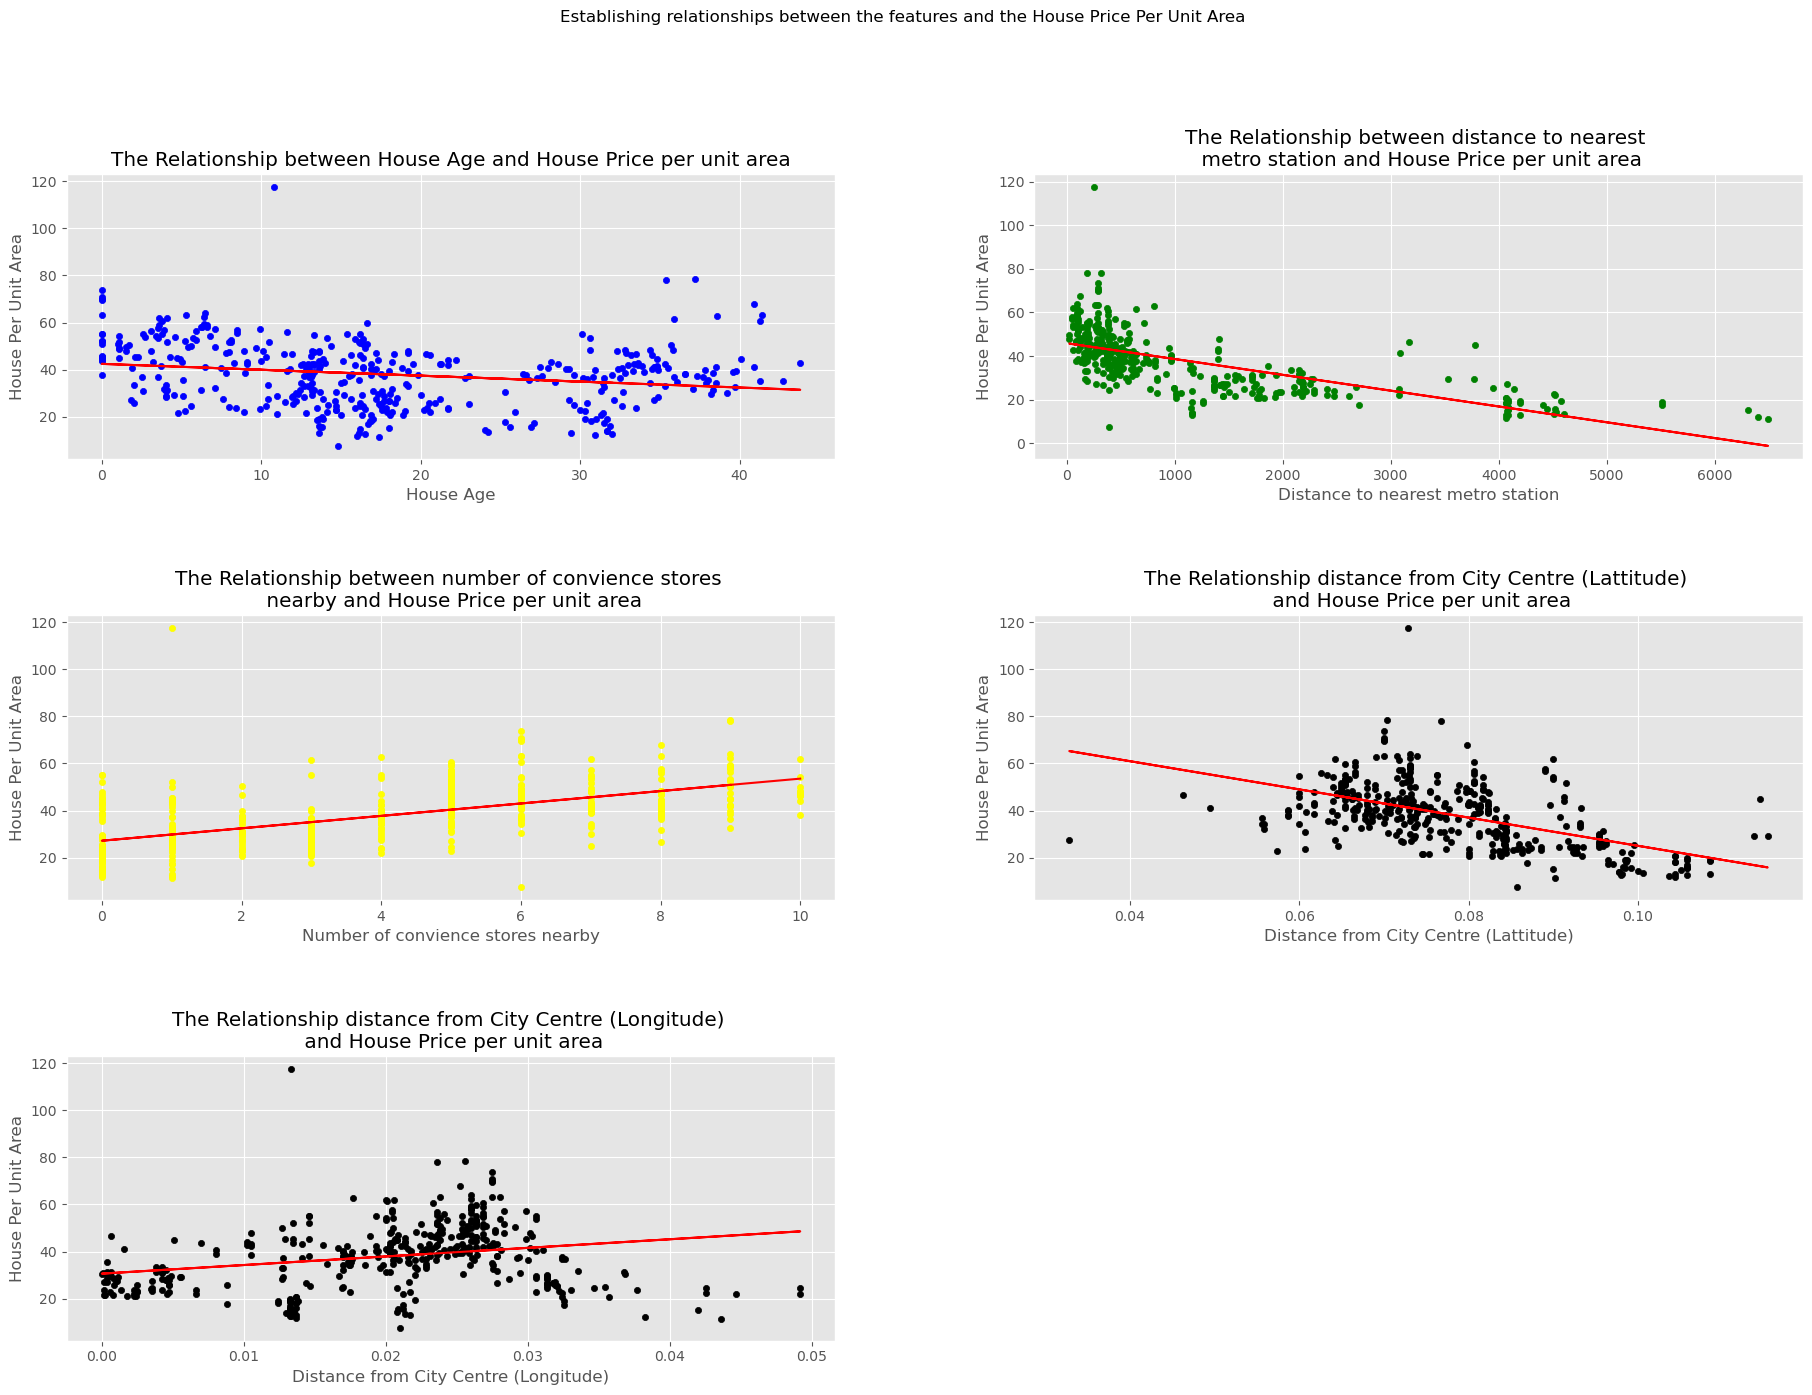

In [27]:
fig = plt.figure()
fig.suptitle('Establishing relationships between the features and the House Price Per Unit Area')    
ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)

fig.tight_layout(pad=1.5)

# plot 1

df1.plot(kind = 'scatter', x = 'X0', y = 'Y', figsize = (20,15), color = 'blue', ax=ax0)
ax0.plot(X0, fit0[0]*X0 + fit0[1], color = 'red')
ax0.set_title('The Relationship between House Age and House Price per unit area')
ax0.set_xlabel('House Age')
ax0.set_ylabel('House Per Unit Area')

# Plot 2 

df1.plot(kind = 'scatter', x = 'X1', y = 'Y', figsize = (20,15), color = 'green', ax=ax1)
ax1.plot(X1, fit1[0]*X1 + fit1[1], color = 'red')
ax1.set_title('The Relationship between distance to nearest \n metro station and House Price per unit area')
ax1.set_xlabel('Distance to nearest metro station')
ax1.set_ylabel('House Per Unit Area')

# Plot 3

df1.plot(kind = 'scatter', x = 'X2', y = 'Y', figsize = (20,15), color = 'yellow', ax=ax2)
ax2.plot(X2, fit2[0]*X2 + fit2[1], color = 'red')
ax2.set_title('The Relationship between number of convience stores \n nearby and House Price per unit area')
ax2.set_xlabel('Number of convience stores nearby')
ax2.set_ylabel('House Per Unit Area')

# Plot 4

df1.plot(kind = 'scatter', x = 'X3', y = 'Y', figsize = (20,15), color = 'black', ax=ax3)
ax3.plot(X3, fit3[0]*X3 + fit3[1], color = 'red')
ax3.set_title('The Relationship distance from City Centre (Lattitude) \n and House Price per unit area')
ax3.set_xlabel('Distance from City Centre (Lattitude)')
ax3.set_ylabel('House Per Unit Area')

# Plot 5

df1.plot(kind = 'scatter', x = 'X4', y = 'Y', figsize = (20,15), color = 'black', ax=ax4)
ax4.plot(X4, fit4[0]*X4 + fit4[1], color = 'red')
ax4.set_title('The Relationship distance from City Centre (Longitude) \n and House Price per unit area')
ax4.set_xlabel('Distance from City Centre (Longitude)')
ax4.set_ylabel('House Per Unit Area')

From these graphs we can see that there is a corrlation between the feature and the target variable. We see that House age doesnt have much impact on the price as the gradient isn't large. Whereas we can see a strong correlation between the distance from the metro station - where we see that the further away a station is from the house , the cheaper the value. Another relationship is that the higher the number of convience stores the higher the values. Where we see some inconsitencies is with the distance between the City Centre and the house. For Latitude we see that the further away the house is from city centre the lower the price - this is from a North / South direction. However, looking at distance from city centre by longitude we can see that the house price per unit area increases. The establised relastionship could suggest the Tapei has mixed zones of house values which would reflect on there being possible slums and wealthy areas . We now seek to see if a combination of features contibute to the House Price per unit area

#### Model Devlopment

We want to see and establish two relationships to see if we can confirm our hypothesis

##### Proto Model (House Age vs Price)

Lets have a motivating model of comparing the relationship between house age and Price per unit area. 

In [28]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1

LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['X0']], df[['Y']],
                                                    test_size = 0.1, 
                                                    random_state = 0) 

lr1.fit(x_train, y_train)

print('Coefficent:', lr1.coef_)
print('Coefficent:', lr1.intercept_)

Coefficent: [[-0.21323361]]
Coefficent: [-0.00850166]


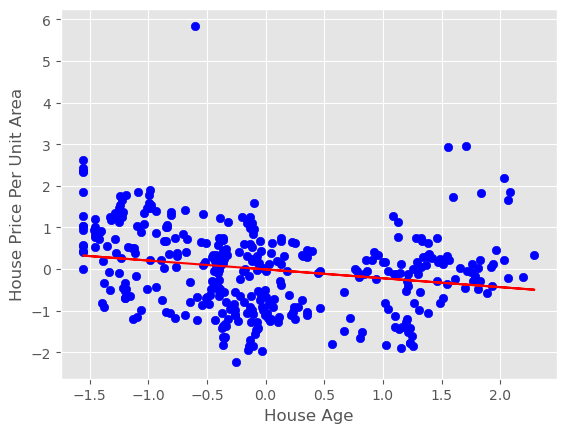

In [30]:
# Lets Plot our model again: 
# Note that the values have been standardised 
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lr1.coef_[0][0]*x_train + lr1.intercept_[0], '-r') 
plt.xlabel('House Age')
plt.ylabel('House Price Per Unit Area')
plt.show()

In [31]:
# Evaluation 
from sklearn.metrics import r2_score 
y_pred = lr1.predict(x_test)

calc1 = np.mean(np.absolute(y_pred - y_test))
calc2 = np.mean((y_pred - y_test)**2)
calc3 = r2_score(y_test ,y_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)


Mean Absolute Error: 0.7109990557646729
Mean Squared Error: 0.6634048391684557
r2_score: 0.050894294885912905


The R2 Score is close to 0 hence it dose not really explain any of the variation around the mean

<Axes: xlabel='X0', ylabel='Y'>

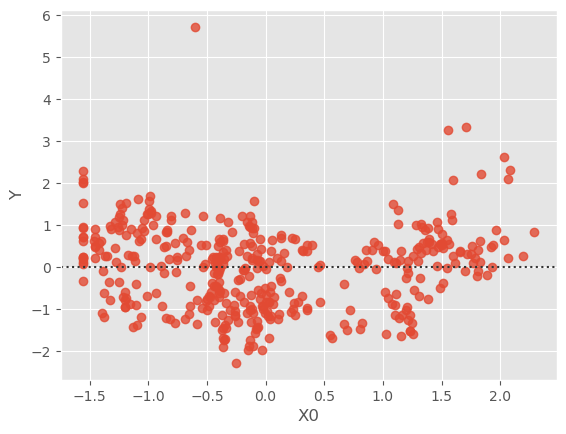

In [32]:
import seaborn as sns 
sns.residplot(x = 'X0', y = 'Y', data = df)

Seems like theres a smile which suggests a ordered polynomial regression model would be needed

##### Model 2 (House Age, Number Of Shops, Distance to nearest shop vs Price)

In [46]:
lr2 = LinearRegression()
lr2

LinearRegression()

##### Model Devlopment 

In [34]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df[['X0', 'X1', 'X2']], df[['Y']],
                                                    test_size = 0.1, 
                                                    random_state = 0) 

lr2.fit(x1_train, y1_train)

print('Coefficent:', lr2.coef_)
print('Coefficent:', lr2.intercept_)

Coefficent: [[-0.2166313  -0.49081766  0.30697716]]
Coefficent: [0.00378361]


In [35]:
y1_pred = lr2.predict(x1_test)

calc1 = np.mean(np.absolute(y1_pred - y1_test))
calc2 = np.mean((y1_pred - y1_test)**2)
calc3 = r2_score(y1_test ,y1_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.4400418920210705
Mean Squared Error: 0.31965942168421463
r2_score: 0.5426765635381218


##### Model Evaluation

In [36]:
from sklearn.model_selection import cross_val_score

R2 = cross_val_score(lr2 , df[['X0', 'X1', 'X2']], df[['Y']], cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.60414906 0.6950347  0.55074248 0.41600204 0.73723482 0.54913196
 0.2412641  0.55784409 0.49765271 0.62792247]
The mean of the folds (r^2 Score): 0.5476978426888464
The standard deviation of the folds (r^2 Score): 0.13458059276121787


In [37]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr2, df[['X0', 'X1', 'X2']], df[['Y']], cv = 10)
yhat[0:5]

array([[0.69820046],
       [0.74508883],
       [0.36958597],
       [0.36958597],
       [0.59198772]])

##### Model 2 (Distance from City Centre (Long and Lat) vs Price)

In [38]:
lr3 = LinearRegression()
lr3

LinearRegression()

##### Model Development

In [39]:
x2_train, x2_test, y2_train, y2_test = train_test_split(df[['X3','X4']], df[['Y']],
                                                    test_size = 0.1, 
                                                    random_state = 0) 

lr3.fit(x2_train, y2_train)

print('Coefficent:', lr3.coef_)
print('Coefficent:', lr3.intercept_)

Coefficent: [[-0.52946992  0.25734495]]
Coefficent: [0.00651092]


In [40]:
y2_pred = lr3.predict(x2_test)

calc1 = np.mean(np.absolute(y2_pred - y2_test))
calc2 = np.mean((y2_pred - y2_test)**2)
calc3 = r2_score(y2_test , y2_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.5671768764558086
Mean Squared Error: 0.5335508354918227
r2_score: 0.23667101589367578


##### Model Evaluation 


In [54]:
R2 = cross_val_score(lr2 , df[['X3','X4']], df[['Y']], cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.44021904 0.44537813 0.45890975 0.0875237  0.3729647  0.46285805
 0.20647788 0.35201486 0.21299521 0.2641742 ]
The mean of the folds (r^2 Score): 0.33035155398202487
The standard deviation of the folds (r^2 Score): 0.12415085502228602


In [52]:
yhat = cross_val_predict(lr2, df[['X3','X4']], df[['Y']], cv = 10)
yhat[0:5]

array([[0.69505526],
       [0.56156762],
       [0.97330297],
       [0.97330297],
       [0.58077483]])

We can see that from both models: Model 2 has a lower average R^2 Score than model 1. 
Whereas Model 1 has a smaller Mean Squared Error and Mean Absolute Error. 
We can build another model to see if all features contribute to a better model. 

##### Model 3 (All Features vs. House Price)

In [47]:
lr4 = LinearRegression()
lr4

LinearRegression()

##### Model Development

In [49]:
x3_train, x3_test, y3_train, y3_test = train_test_split(df[['X0', 'X1', 'X2', 'X3', 'X4']], df[['Y']],
                                                    test_size = 0.1, 
                                                    random_state = 0) 

lr4.fit(x3_train, y3_train)

print('Coefficent:', lr4.coef_)
print('Coefficent:', lr4.intercept_)

Coefficent: [[-0.23097706 -0.34580186  0.25741192 -0.23726623  0.10356441]]
Coefficent: [0.00615429]


In [50]:
y3_pred = lr4.predict(x3_test)

calc1 = np.mean(np.absolute(y3_pred - y3_test))
calc2 = np.mean((y3_pred - y3_test)**2)
calc3 = r2_score(y3_test ,y3_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.40015287495936047
Mean Squared Error: 0.2960026536345691
r2_score: 0.5765213174422726


##### Model Evaluation

In [51]:
R2 = cross_val_score(lr2 , df[['X0', 'X1', 'X2', 'X3', 'X4']], df[['Y']], cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.69846967 0.73106478 0.64227051 0.32688867 0.7026834  0.64975773
 0.29171088 0.57486147 0.57197525 0.57527285]
The mean of the folds (r^2 Score): 0.5764955206152661
The standard deviation of the folds (r^2 Score): 0.14415855934235094


In [55]:
yhat = cross_val_predict(lr4, df[['X0','X1','X2','X3','X4']], df[['Y']], cv = 10)
yhat[0:5]

array([[0.78028222],
       [0.82603083],
       [0.71268941],
       [0.71268941],
       [0.7640323 ]])

#### Conclusion

We can see that when using the metrics MAE, MSE ans R^2 Model 3 is the best Model to use for regression with a AVR R2 Score of 0.576, MSE of 0.296 and, MAE 0.400. 